In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [2]:
mlc_df = pd.read_csv('../data/MLC_Data.csv')
print(mlc_df.shape)
mlc_df.head(3)

(100000, 13)


,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0


### We have 100k rows and 13 columns.

In [3]:
pd.set_option('display.max.columns',None)

In [4]:
mlc_df.tail()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1
99999,QZK6F2019397,QZ,K6F,20.0,2/1/2021,Spotify,"11,245",Lexie Liu,泥鞋（北京）文化传媒有限公司,黑洞 Metropolis,无限意识 Meta Ego,259,1


In [5]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   If                                         98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [6]:
mlc_df.describe()

,Year of Reference,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
count,98239.000000,100000.000000,100000.000000
mean,19.671933,1016.893690,0.541610
std,12.638870,15565.692133,0.498268
min,0.000000,0.000000,0.000000
25%,17.000000,149.000000,0.000000
50%,19.000000,190.000000,1.000000
75%,20.000000,236.000000,1.000000
max,99.000000,818738.000000,1.000000


In [7]:
mlc_df[('Streaming Platform (DSP)')].value_counts()

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: Streaming Platform (DSP), dtype: int64

In [8]:
domestic = mlc_df.loc[mlc_df['Country Code']== 'US']

domestic['Streaming Platform (DSP)'].value_counts()

Spotify               13614
Apple                  9389
Amazon                 5919
Pandora                5646
Tidal                  1425
YouTube                1095
SoundCloud              857
GTL                     438
Melodyv                 342
Trebel                  333
iHeart Radio            284
AudioMack               234
NugsNet                 142
LiveXLive                84
Qoboz                    55
Midwest Tape             39
Deezer                   29
Anghami                  24
Smithsonian              13
Recisio                  13
Ultimate Guitar          10
Sonos                     9
Wolfgangs                 2
PowerMusic                2
Pacemaker                 1
Fan Label                 1
Classical Archives        1
MixCloud                  1
Name: Streaming Platform (DSP), dtype: int64

In [9]:
mlc_df[('Country Code')].value_counts()

US    41621
QZ    17189
QM     8409
TC     8295
GB     6611
      ...  
QA        1
LS        1
BO        1
WW        1
DO        1
Name: Country Code, Length: 77, dtype: int64

In [10]:
mlc_df = mlc_df.rename(columns={"If":"ISRC"})

In [11]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   If                                         98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [12]:
mlc_df.columns = ['ISRC', 'Country', 'Registrant', 'Release_Year', 'Period', 'DSP', 'Streams', 'Artist', 'Label', 'Song', 'Album', 'Duration', 'Songwriter?']

In [13]:
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [14]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISRC          98240 non-null   object 
 1   Country       98303 non-null   object 
 2   Registrant    98303 non-null   object 
 3   Release_Year  98239 non-null   float64
 4   Period        91898 non-null   object 
 5   DSP           96001 non-null   object 
 6   Streams       100000 non-null  object 
 7   Artist        100000 non-null  object 
 8   Label         98992 non-null   object 
 9   Song          100000 non-null  object 
 10  Album         99931 non-null   object 
 11  Duration      100000 non-null  int64  
 12  Songwriter?   100000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ MB


In [15]:
mlc_df[('Artist')].value_counts(ascending=False)

Various artists                                           967
Lil Durk                                                  446
Zach Bryan                                                394
Youngboy Never Broke Again                                335
Taylor Swift                                              313
                                                         ... 
Southern Structure                                          1
El de La Guitarra                                           1
Santa Fe Klan,Robot95                                       1
Switchfoot,Jenn Johnson                                     1
Piano for Relax and Sleep [feat. Piano Sleeping Music]      1
Name: Artist, Length: 21149, dtype: int64

### There's a problem with blank spaces in other columns.

In [16]:
mlc_df.loc[mlc_df['Duration'] ==mlc_df.Duration.max()]

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
19931,QZES81895037,QZ,ES8,18.0,2/1/2021,Trebel,"6,464",Megan Thee Stallion,Warner,Cry Baby (feat. DaBaby),Good News,818738,0


In [17]:
mlc_df.loc[mlc_df['Streams'] ==mlc_df.Streams.max()]

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
15990,USAT21804343,US,AT2,18.0,3/1/2021,Amazon,999,Leo,Leo,Chandelier - Metal Cover,Leo Metal Covers Volume 2,206,0
41418,USUM71909791,US,UM7,19.0,3/1/2021,Amazon,999,Punk Goes,Fearless Records,I Want It That Way,Punk Goes Pop,211,0
50275,USUYG1323621,US,UYG,13.0,3/1/2021,Amazon,999,Little Baby Bum Nursery Rhyme Friends,Little Baby Bum Nursery Rhyme Friends,Little Bunny Foo Foo,Little Bunny Foo Foo,90,1


In [18]:
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [19]:
mlc_df["Streams"] = mlc_df["Streams"].str.replace(' ','')

In [20]:
mlc_df["Streams"] = mlc_df["Streams"].str.replace(',','')

In [21]:
mlc_df[["Streams"]] = mlc_df[["Streams"]].apply(pd.to_numeric)

In [22]:
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [23]:
mlc_df.loc[mlc_df['Streams'] ==mlc_df.Streams.max()]

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
46643,USAT21901833,US,AT2,19.0,4/1/2021,Spotify,21456166,"Doja Cat,SZA",Kemosabe Records/RCA Records,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),209,1


In [24]:
mlc_df.sort_values(by='Streams', ascending=False).head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
46643,USAT21901833,US,AT2,19.0,4/1/2021,Spotify,21456166,"Doja Cat,SZA",Kemosabe Records/RCA Records,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),209,1
89141,TCAEW2013140,TC,AEW,20.0,4/1/2021,Apple,17259260,Rod Wave,Alamo Records,Tombstone,SoulFly,160,1
24773,USUG12003339,US,UG1,20.0,1/1/2021,Spotify,17109896,Olivia Rodrigo,Olivia Rodrigo PS,drivers license,drivers license,243,1
48604,QM4DW1706229,QM,4DW,17.0,3/1/2021,Apple,16216932,Drake,OVO,Lemon Pepper Freestyle (feat. Rick Ross),Scary Hours 2,383,1
27720,USUM72104713,US,UM7,21.0,NaN,Apple,15747471,DJ Khaled,Epic/We The Best,EVERY CHANCE I GET (feat. Lil Baby & Lil Durk),KHALED KHALED,237,1


In [25]:
mlc_df['Duration'].max()

818738

In [26]:
mlc_df.loc[mlc_df['Duration'] ==mlc_df.Duration.max()]

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
19931,QZES81895037,QZ,ES8,18.0,2/1/2021,Trebel,6464,Megan Thee Stallion,Warner,Cry Baby (feat. DaBaby),Good News,818738,0


In [27]:
mlc_df.sort_values('Duration', ascending=False).head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
19931,QZES81895037,QZ,ES8,18.0,2/1/2021,Trebel,6464,Megan Thee Stallion,Warner,Cry Baby (feat. DaBaby),Good News,818738,0
34584,DEN962000842,DE,N96,20.0,2/1/2021,Trebel,4797,SZA,Sony Music,Good Days,Good Days,770091,0
20399,JMA272011862,JM,A27,20.0,2/1/2021,Trebel,3492,H.E.R.,Sony Music,Damage,Damage,714437,0
48381,USAT22006112,US,AT2,20.0,2/1/2021,Trebel,2965,Kevo Muney,Warner,Leave Some Day,Leave Some Day,463500,0
32826,USUM71116321,US,UM7,11.0,NaN,NaN,16,Darren Korb,Supergiant Games,Gates of Hell,Hades: Original Soundtrack,356461,1


### we're just looking at the most popular genres for example.  we're looking just at volume. this data is unmatched.  

### trying to weigh based on streams.  we're not allowed to know weight of stream and the amount paid to the artist.

### what are the limitations of this dataset for genres?  we have limitations of just 4k artists in this dataset.

### she wants to know our direction we're taking our data.  questions to follow-up with for the guy.

### recording labels - was song writer info was provided by dsp.  

### are there any patterns for DSPS to omit information.  Is this DSP dropping the ball with supplying information?
### do we have the information or not?  0 = we dont have the information? if not 

In [28]:
###Make sw_ratio into songwriter_df with new index and DSP column and SW_avg column
sw_ratio = mlc_df.groupby('DSP')['Songwriter?'].mean()
sw_ratio = sw_ratio.sort_values(ascending=False)
songwriter_df = pd.DataFrame(sw_ratio)
songwriter_df.columns = ['SW_Avg']
songwriter_df.reset_index(inplace=True)

In [29]:
print(songwriter_df)

                   DSP    SW_Avg
0   Classical Archives  1.000000
1                Qoboz  0.903846
2               Deezer  0.862745
3              Spotify  0.854376
4                Apple  0.808514
5              Recisio  0.545455
6               Amazon  0.261740
7              Pandora  0.244828
8              Melodyv  0.114596
9            LiveXLive  0.070000
10                 GTL  0.028440
11               Tidal  0.003692
12         Smithsonian  0.000000
13     Ultimate Guitar  0.000000
14              Trebel  0.000000
15           Wolfgangs  0.000000
16          SoundCloud  0.000000
17               Sonos  0.000000
18             YouTube  0.000000
19           Pacemaker  0.000000
20          PowerMusic  0.000000
21             Anghami  0.000000
22             NugsNet  0.000000
23           MonkingMe  0.000000
24            MixCloud  0.000000
25        Midwest Tape  0.000000
26           Fan Label  0.000000
27           AudioMack  0.000000
28        iHeart Radio  0.000000


### These dsps are supplying incorrect or limited information for some heavily streamed.  

### 0 = DSP didn't supply the song writer info.

### what is he asking?  how are we using the data to help them better market?

In [30]:
mlc_df.isnull().sum()

ISRC            1760
Country         1697
Registrant      1697
Release_Year    1761
Period          8102
DSP             3999
Streams            0
Artist             0
Label           1008
Song               0
Album             69
Duration           0
Songwriter?        0
dtype: int64

In [31]:
mlc_df.dtypes

ISRC             object
Country          object
Registrant       object
Release_Year    float64
Period           object
DSP              object
Streams           int64
Artist           object
Label            object
Song             object
Album            object
Duration          int64
Songwriter?       int64
dtype: object

In [32]:
mlc_df.select_dtypes(include=['object'])

,ISRC,Country,Registrant,Period,DSP,Artist,Label,Song,Album
0,USUG12101043,US,UG1,NaN,AudioMack,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#
1,USRC12100543,US,RC1,NaN,SoundCloud,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD
2,USSM12102263,US,SM1,NaN,SoundCloud,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD
3,USLD91731547,US,LD9,2/1/2021,Trebel,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010
4,USAT22007048,US,AT2,NaN,AudioMack,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#
...,...,...,...,...,...,...,...,...,...
99995,QZK6F2019397,QZ,K6F,3/1/2021,Spotify,Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size)
99996,QZK6F2019397,QZ,K6F,3/1/2021,Spotify,yama,Sony Music Labels Inc.,麻痺,麻痺
99997,SE6HN1926755,SE,6HN,3/1/2021,Spotify,yama,Sony Music Labels Inc.,麻痺,麻痺
99998,SEYOK1669274,SE,YOK,3/1/2021,Apple,yama,Sony Music Labels Inc.,麻痺,麻痺 - Single


In [33]:
mlc_df['Artist'].str.split(',')

0                        [Future]
1                      [LUCKY3RD]
2                      [LUCKY3RD]
3        [Bachata & Merengue Mix]
4                        [Foolio]
                   ...           
99995                      [Myuk]
99996                      [yama]
99997                      [yama]
99998                      [yama]
99999                 [Lexie Liu]
Name: Artist, Length: 100000, dtype: object

In [34]:
mlc_df['Artist'].str.split(',', expand = True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Future,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,LUCKY3RD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,LUCKY3RD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Bachata & Merengue Mix,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Foolio,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Myuk,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
99996,yama,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
99997,yama,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
99998,yama,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [35]:
mlc_df['Artist'].str.split(',', expand = True)[0]

0                        Future
1                      LUCKY3RD
2                      LUCKY3RD
3        Bachata & Merengue Mix
4                        Foolio
                  ...          
99995                      Myuk
99996                      yama
99997                      yama
99998                      yama
99999                 Lexie Liu
Name: 0, Length: 100000, dtype: object

In [36]:
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [37]:
mlc_df['Artist'] = mlc_df['Artist'].str.split(',', expand = True)[0]

In [38]:
mlc_df.head(10)

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1
7,QMJMT2103634,QM,JMT,21.0,2/1/2021,Amazon,7842,NF,NF Real Music,-Interlude-,The Search,49,0
8,USRC12100543,US,RC1,21.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1
9,USAT22007048,US,AT2,20.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1


###  

dsp is supposed to supply info - dsps are not good at supplying us information.  look at those that are zero.  see if there's any number.

*these dsps are not supplying information, yet there's such and such amount of streams.  get a sum of streams for the individual DSPS.
*weigh it by streams.  types of songs are not getting associated.  
**find a trend why the numbers are so low. = genre data.


In [39]:
streams_per_DSP = mlc_df.groupby('DSP')['Streams'].sum()
streams_per_DSP = streams_per_DSP.sort_values(ascending=False)
print(streams_per_DSP)

DSP
Spotify               2552563722
Apple                 1606453701
Pandora                874236566
SoundCloud             166813813
YouTube                158031119
Amazon                 151199800
Tidal                   48793126
AudioMack               11991559
Melodyv                  5384657
iHeart Radio             2141959
GTL                      1280764
Trebel                    149347
NugsNet                   110709
LiveXLive                 101307
Deezer                     87830
Midwest Tape               85708
Anghami                    34682
Sonos                      31402
Qoboz                       6621
MonkingMe                   3549
PowerMusic                  3154
MixCloud                    2661
Pacemaker                   1707
Wolfgangs                    965
Ultimate Guitar              309
Smithsonian                  208
Fan Label                     91
Recisio                       29
Classical Archives            20
Name: Streams, dtype: int64


In [40]:
streams_df = pd.DataFrame(streams_per_DSP)
streams_df.reset_index(inplace=True)
streams_df.columns = ['DSP', 'Streams_Per_DSP']
print(streams_df)

                   DSP  Streams_Per_DSP
0              Spotify       2552563722
1                Apple       1606453701
2              Pandora        874236566
3           SoundCloud        166813813
4              YouTube        158031119
5               Amazon        151199800
6                Tidal         48793126
7            AudioMack         11991559
8              Melodyv          5384657
9         iHeart Radio          2141959
10                 GTL          1280764
11              Trebel           149347
12             NugsNet           110709
13           LiveXLive           101307
14              Deezer            87830
15        Midwest Tape            85708
16             Anghami            34682
17               Sonos            31402
18               Qoboz             6621
19           MonkingMe             3549
20          PowerMusic             3154
21            MixCloud             2661
22           Pacemaker             1707
23           Wolfgangs              965


In [41]:
rows_per_DSP = mlc_df['DSP'].value_counts()
print(rows_per_DSP)

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64


In [42]:
rows_df = pd.DataFrame(rows_per_DSP)
rows_df.reset_index(inplace=True)
rows_df.columns = ['DSP', 'Songs_Per_DSP']
print(rows_df)

                   DSP  Songs_Per_DSP
0              Spotify          32268
1                Apple          22200
2               Amazon          14438
3              Pandora          13777
4                Tidal           3521
5              YouTube           2752
6           SoundCloud           2122
7                  GTL           1090
8              Melodyv            829
9               Trebel            817
10        iHeart Radio            707
11           AudioMack            550
12             NugsNet            316
13           LiveXLive            200
14               Qoboz            104
15        Midwest Tape            102
16              Deezer             51
17             Anghami             46
18               Sonos             23
19             Recisio             22
20         Smithsonian             21
21     Ultimate Guitar             19
22          PowerMusic              8
23           Wolfgangs              4
24           Fan Label              4
25          

mlc_df - main df
rows_df - count of rows per DSP
streams_df - streams per DSP
songwriter_df -  yes or no to song writer provided info

### Merge the 3 dfs together based off DSP

In [43]:
DSP_df1 = pd.merge(songwriter_df, streams_df, on=['DSP'], how='inner')
print(DSP_df1)

                   DSP    SW_Avg  Streams_Per_DSP
0   Classical Archives  1.000000               20
1                Qoboz  0.903846             6621
2               Deezer  0.862745            87830
3              Spotify  0.854376       2552563722
4                Apple  0.808514       1606453701
5              Recisio  0.545455               29
6               Amazon  0.261740        151199800
7              Pandora  0.244828        874236566
8              Melodyv  0.114596          5384657
9            LiveXLive  0.070000           101307
10                 GTL  0.028440          1280764
11               Tidal  0.003692         48793126
12         Smithsonian  0.000000              208
13     Ultimate Guitar  0.000000              309
14              Trebel  0.000000           149347
15           Wolfgangs  0.000000              965
16          SoundCloud  0.000000        166813813
17               Sonos  0.000000            31402
18             YouTube  0.000000        158031119


In [44]:
DSP_df2 = pd.merge(DSP_df1, rows_df, on=['DSP'], how='inner')
print(DSP_df2)

                   DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
0   Classical Archives  1.000000               20              2
1                Qoboz  0.903846             6621            104
2               Deezer  0.862745            87830             51
3              Spotify  0.854376       2552563722          32268
4                Apple  0.808514       1606453701          22200
5              Recisio  0.545455               29             22
6               Amazon  0.261740        151199800          14438
7              Pandora  0.244828        874236566          13777
8              Melodyv  0.114596          5384657            829
9            LiveXLive  0.070000           101307            200
10                 GTL  0.028440          1280764           1090
11               Tidal  0.003692         48793126           3521
12         Smithsonian  0.000000              208             21
13     Ultimate Guitar  0.000000              309             19
14              Trebel  0

In [45]:
# Reorder by Streams_Per_DSP in descending order = FINAL MERGED DATAFRAME
DSP_df2 = DSP_df2.sort_values(by=['Streams_Per_DSP'], ascending=False)
print(DSP_df2)

                   DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3              Spotify  0.854376       2552563722          32268
4                Apple  0.808514       1606453701          22200
7              Pandora  0.244828        874236566          13777
16          SoundCloud  0.000000        166813813           2122
18             YouTube  0.000000        158031119           2752
6               Amazon  0.261740        151199800          14438
11               Tidal  0.003692         48793126           3521
27           AudioMack  0.000000         11991559            550
8              Melodyv  0.114596          5384657            829
28        iHeart Radio  0.000000          2141959            707
10                 GTL  0.028440          1280764           1090
14              Trebel  0.000000           149347            817
22             NugsNet  0.000000           110709            316
9            LiveXLive  0.070000           101307            200
2               Deezer  0

In [46]:
# Plot top 7 by Streams
top_7 = DSP_df2.head(7)
print(top_7)

           DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  0.854376       2552563722          32268
4        Apple  0.808514       1606453701          22200
7      Pandora  0.244828        874236566          13777
16  SoundCloud  0.000000        166813813           2122
18     YouTube  0.000000        158031119           2752
6       Amazon  0.261740        151199800          14438
11       Tidal  0.003692         48793126           3521


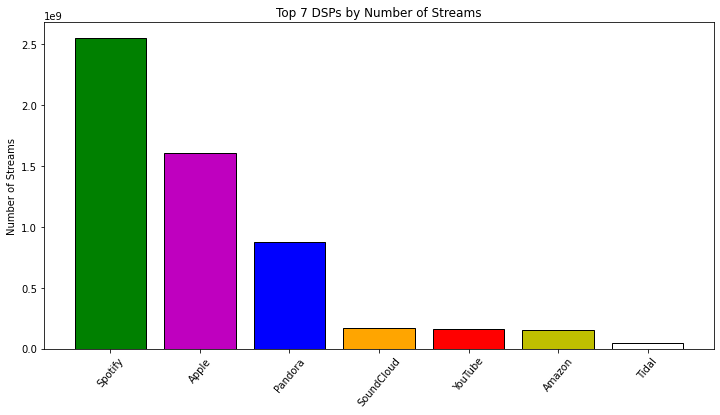

In [47]:
plt.figure(figsize=(12, 6))
plt.bar(top_7.DSP, top_7.Streams_Per_DSP,color=['g', 'm', 'b', 'orange', 'r', 'y', '1'], edgecolor='black')
plt.ylabel('Number of Streams') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Top 7 DSPs by Number of Streams');

In [48]:
SW_avg_df = DSP_df2.sort_values(by=['SW_Avg'], ascending=False)
print(SW_avg_df)

                   DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
0   Classical Archives  1.000000               20              2
1                Qoboz  0.903846             6621            104
2               Deezer  0.862745            87830             51
3              Spotify  0.854376       2552563722          32268
4                Apple  0.808514       1606453701          22200
5              Recisio  0.545455               29             22
6               Amazon  0.261740        151199800          14438
7              Pandora  0.244828        874236566          13777
8              Melodyv  0.114596          5384657            829
9            LiveXLive  0.070000           101307            200
10                 GTL  0.028440          1280764           1090
11               Tidal  0.003692         48793126           3521
20          PowerMusic  0.000000             3154              8
26           Fan Label  0.000000               91              4
12         Smithsonian  0

In [49]:
# Subset the top 7 DSPs by streams to include only those top 7 we want by SW_Avg desc
top_7_sw = SW_avg_df.loc[SW_avg_df['DSP'].isin(['Spotify','Apple', 'Pandora', 'SoundCloud', 'YouTube', 'Amazon', 'Tidal'])]
print(top_7_sw)

           DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  0.854376       2552563722          32268
4        Apple  0.808514       1606453701          22200
6       Amazon  0.261740        151199800          14438
7      Pandora  0.244828        874236566          13777
11       Tidal  0.003692         48793126           3521
16  SoundCloud  0.000000        166813813           2122
18     YouTube  0.000000        158031119           2752


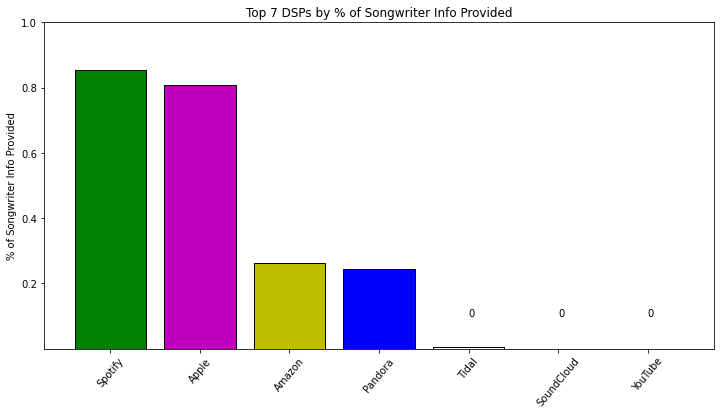

In [50]:
# Plot top 7 by SW_Avg
plt.figure(figsize=(12, 6))
plt.bar(top_7_sw.DSP, top_7_sw.SW_Avg, color=['g', 'm', 'y', 'b', '1', 'orange', 'r'], edgecolor='black')
plt.ylabel('% of Songwriter Info Provided')
plt.xticks(rotation = 50)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
plt.text('YouTube', 0.1, '0')
plt.text('SoundCloud', 0.1, '0')
plt.text('Tidal', 0.1, '0')
plt.title('Top 7 DSPs by % of Songwriter Info Provided');

In [51]:
# Subset the DSPs by Songs_Per_DSP
Songs_Per_DSP_df = DSP_df2.sort_values(by=['Songs_Per_DSP'], ascending=False)
print(Songs_Per_DSP_df)

                   DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3              Spotify  0.854376       2552563722          32268
4                Apple  0.808514       1606453701          22200
6               Amazon  0.261740        151199800          14438
7              Pandora  0.244828        874236566          13777
11               Tidal  0.003692         48793126           3521
18             YouTube  0.000000        158031119           2752
16          SoundCloud  0.000000        166813813           2122
10                 GTL  0.028440          1280764           1090
8              Melodyv  0.114596          5384657            829
14              Trebel  0.000000           149347            817
28        iHeart Radio  0.000000          2141959            707
27           AudioMack  0.000000         11991559            550
22             NugsNet  0.000000           110709            316
9            LiveXLive  0.070000           101307            200
1                Qoboz  0

In [52]:
top_7_sdp = Songs_Per_DSP_df.loc[Songs_Per_DSP_df['DSP'].isin(['Spotify','Apple', 'Pandora', 'SoundCloud', 'YouTube', 'Amazon', 'Tidal'])]
print(top_7_sdp)

           DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  0.854376       2552563722          32268
4        Apple  0.808514       1606453701          22200
6       Amazon  0.261740        151199800          14438
7      Pandora  0.244828        874236566          13777
11       Tidal  0.003692         48793126           3521
18     YouTube  0.000000        158031119           2752
16  SoundCloud  0.000000        166813813           2122


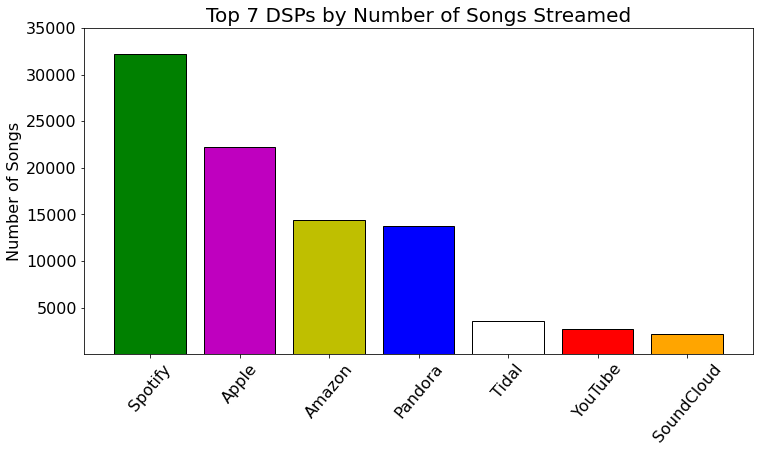

In [53]:
# Plot top 7 by Songs_Per_DSP
plt.figure(figsize=(12, 6))
plt.bar(top_7_sdp.DSP, top_7_sdp.Songs_Per_DSP, color=['g', 'm', 'y', 'b', '1', 'r', 'orange'], edgecolor='black')
plt.ylabel('Number of Songs', fontsize=16)
plt.xticks(rotation = 50, fontsize=16)
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], fontsize=16)
plt.title('Top 7 DSPs by Number of Songs Streamed', fontsize=20);

### Creating a DF based off Labels

In [54]:
streams_per_Label=mlc_df.groupby('Label')['Streams'].sum()
streams_per_Label=streams_per_Label.sort_values(ascending=False)
print(streams_per_Label)

Label
Atlantic Records                                 172396961
Columbia                                         131147208
300 Entertainment                                 96692925
Alamo (Geffen Records)                            88320747
Taylor Swift                                      77937703
                                                   ...    
712847 Records DK                                        1
AVATAR GROUP CONSCIOUSNESS                               1
Geomagnetic                                              1
Selected                                                 1
Deen Chaser / Rapbay / Urbanlife Distribution            1
Name: Streams, Length: 11778, dtype: int64


In [55]:
Label_ratio = mlc_df.groupby('Label')['Songwriter?'].mean()
Label_ratio = Label_ratio.sort_values(ascending=False)
print(Label_ratio)


Label
 & Cochise                           1.0
Facet/Warner Records                 1.0
Fam Band                             1.0
Falling Up Entertainment             1.0
FalKKonE                             1.0
                                    ... 
Full + Bless/Renowned Records Ltd    0.0
RellOnTheTrack                       0.0
Full Harmony                         0.0
Full Heart Music                     0.0
🧿RCCJAY🧿                             0.0
Name: Songwriter?, Length: 11778, dtype: float64


In [56]:
Label_df = pd.merge(streams_per_Label, Label_ratio, on=['Label'], how='inner')
print(Label_df)

                                                 Streams  Songwriter?
Label                                                                
Atlantic Records                               172396961     0.484104
Columbia                                       131147208     0.875445
300 Entertainment                               96692925     0.278607
Alamo (Geffen Records)                          88320747     0.639053
Taylor Swift                                    77937703     0.429658
...                                                  ...          ...
712847 Records DK                                      1     0.000000
AVATAR GROUP CONSCIOUSNESS                             1     0.000000
Geomagnetic                                            1     0.000000
Selected                                               1     0.000000
Deen Chaser / Rapbay / Urbanlife Distribution          1     0.000000

[11778 rows x 2 columns]


In [57]:
Label_df.reset_index(inplace=True)
Label_df = Label_df.rename(columns = {'index': "Label"})
print(Label_df)

                                               Label    Streams  Songwriter?
0                                   Atlantic Records  172396961     0.484104
1                                           Columbia  131147208     0.875445
2                                  300 Entertainment   96692925     0.278607
3                             Alamo (Geffen Records)   88320747     0.639053
4                                       Taylor Swift   77937703     0.429658
...                                              ...        ...          ...
11773                              712847 Records DK          1     0.000000
11774                     AVATAR GROUP CONSCIOUSNESS          1     0.000000
11775                                    Geomagnetic          1     0.000000
11776                                       Selected          1     0.000000
11777  Deen Chaser / Rapbay / Urbanlife Distribution          1     0.000000

[11778 rows x 3 columns]


In [58]:
Top_7_Labels = Label_df.head(7)
print(Top_7_Labels)

                    Label    Streams  Songwriter?
0        Atlantic Records  172396961     0.484104
1                Columbia  131147208     0.875445
2       300 Entertainment   96692925     0.278607
3  Alamo (Geffen Records)   88320747     0.639053
4            Taylor Swift   77937703     0.429658
5           Alamo Records   72800179     0.615108
6            Lofi Records   69694317     0.987013


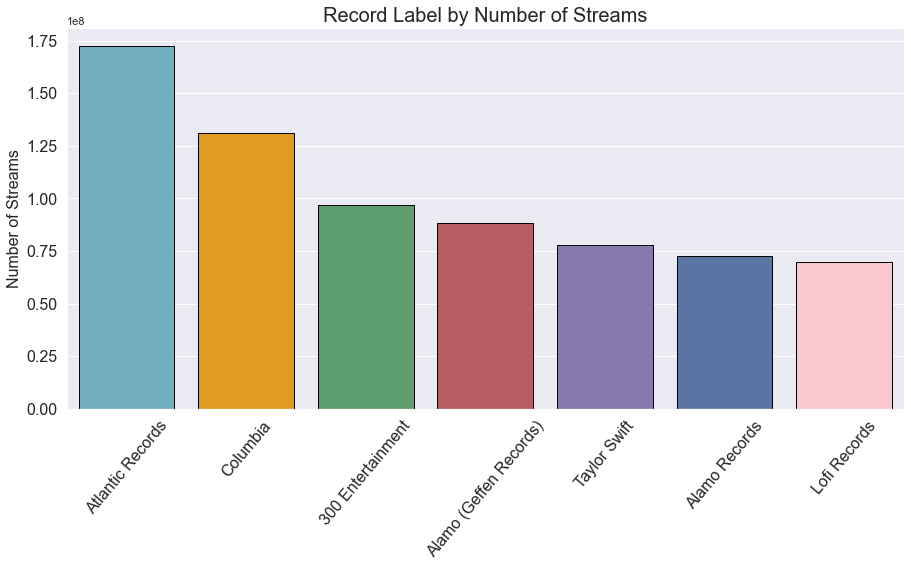

In [59]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.barplot(x="Label", y="Streams", data=Top_7_Labels, palette=['c','orange','g','r','m','b','pink'], edgecolor='black')
plt.title('Record Label by Number of Streams', fontsize = 20)
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('', fontsize=0)
plt.ylabel('Number of Streams', fontsize=16)
plt.gcf().set_size_inches(15,7)

### Sort the top 7 decending order by song writer ratio.

In [60]:
Top_7_Labels = Top_7_Labels.sort_values(by='Songwriter?', ascending=False)
print(Top_7_Labels)

                    Label    Streams  Songwriter?
6            Lofi Records   69694317     0.987013
1                Columbia  131147208     0.875445
3  Alamo (Geffen Records)   88320747     0.639053
5           Alamo Records   72800179     0.615108
0        Atlantic Records  172396961     0.484104
4            Taylor Swift   77937703     0.429658
2       300 Entertainment   96692925     0.278607


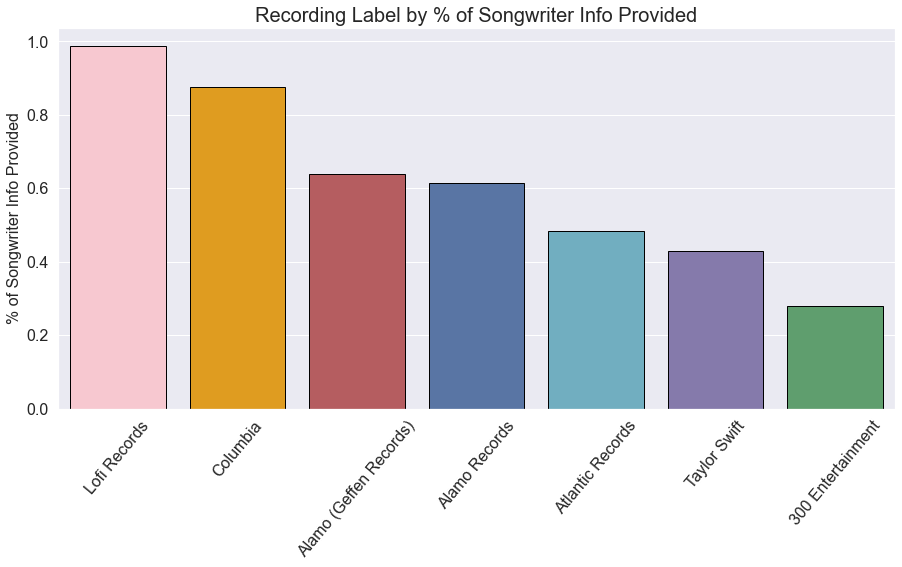

In [61]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.barplot(x="Label", y="Songwriter?", data=Top_7_Labels, palette=['pink','orange','r','b','c','m','g'], edgecolor='black')
plt.title('Recording Label by % of Songwriter Info Provided', fontsize = 20)
plt.xlabel('',fontsize=0)
plt.ylabel('% of Songwriter Info Provided', fontsize=16)
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches(15,7)


In [62]:
Total_DSP_Streams = mlc_df['Streams'].sum()
print (Total_DSP_Streams)

5626550163
